# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.head()

,X.ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,"""5524",1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,"1"""
1,"""2174",1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,"0"""
2,"""4141",1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,"0"""
3,"""6182",1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,"0"""
4,"""5324",1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,"0"""


In [4]:
df.tail()

,X.ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,"""10870",1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,"0"""
2236,"""4001",1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,"0"""
2237,"""7270",1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,"0"""
2238,"""8235",1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,"0"""
2239,"""9405",1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,"1"""


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X.ID                 2240 non-null   object 
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0


# Feature Engineering

## Data Type Conversion

## Convert (X.ID) COLUMN TO INT Data type

In [8]:
df['X.ID']

0        "5524
1        "2174
2        "4141
3        "6182
4        "5324
         ...  
2235    "10870
2236     "4001
2237     "7270
2238     "8235
2239     "9405
Name: X.ID, Length: 2240, dtype: object

In [9]:
df['X.ID'] = df['X.ID'].str.extract('(\d+)').astype('int64')

In [10]:
##Assuming there is always exactly one leading letter##

##df['X.ID'] = df['X.ID'].str[1:].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X.ID                 2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df.head()

,X.ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,"1"""
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,"0"""
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,"0"""
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,"0"""
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,"0"""


## Convert Data type of (Dt_Customer) COLUMN to Date 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X.ID                 2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
df['Dt_Customer']

0         4/9/2012
1         8/3/2014
2       21-08-2013
3        10/2/2014
4       19-01-2014
           ...    
2235    13-06-2013
2236     10/6/2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [16]:
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

## Handling Marital Status Column

In [17]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [18]:
df['Categorized_Marital_Status'] = df['Marital_Status'].replace({'Divorced':'Single','Alone':'Single',
                                                                 'Married':'Couple','Together':'Couple','Absurd':'Other',
                                                                 'Widow':'Single','YOLO':'Other'})

In [19]:
df['Categorized_Marital_Status']

0       Single
1       Single
2       Couple
3       Couple
4       Couple
         ...  
2235    Couple
2236    Couple
2237    Single
2238    Couple
2239    Couple
Name: Categorized_Marital_Status, Length: 2240, dtype: object

## Convert (Response) COLUMN TO INT Data type

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   X.ID                        2240 non-null   int64         
 1   Year_Birth                  2240 non-null   int64         
 2   Education                   2240 non-null   object        
 3   Marital_Status              2240 non-null   object        
 4   Income                      2216 non-null   float64       
 5   Kidhome                     2240 non-null   int64         
 6   Teenhome                    2240 non-null   int64         
 7   Dt_Customer                 2240 non-null   datetime64[ns]
 8   Recency                     2240 non-null   int64         
 9   MntWines                    2240 non-null   int64         
 10  MntFruits                   2240 non-null   int64         
 11  MntMeatProducts             2240 non-null   int64       

In [21]:
df['Response'].value_counts()

0"    1906
1"     334
Name: Response, dtype: int64

In [22]:
df['Response'] = df['Response'].str.extract('(\d+)').astype('int64')

In [23]:
##Assuming there is always exactly in the last letter##

##df['Response'] = df['Response'].str[:-1].astype(int)

In [24]:
df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [25]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   X.ID                        2240 non-null   int64         
 1   Year_Birth                  2240 non-null   int64         
 2   Education                   2240 non-null   object        
 3   Marital_Status              2240 non-null   object        
 4   Income                      2216 non-null   float64       
 5   Kidhome                     2240 non-null   int64         
 6   Teenhome                    2240 non-null   int64         
 7   Dt_Customer                 2240 non-null   datetime64[ns]
 8   Recency                     2240 non-null   int64         
 9   MntWines                    2240 non-null   int64         
 10  MntFruits                   2240 non-null   int64         
 11  MntMeatProducts             2240 non-null   int64       

In [27]:
df.describe()

,X.ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Null Values

In [28]:
df.isnull().sum().sort_values(ascending=False)

Income                        24
X.ID                           0
NumWebPurchases                0
Response                       0
Z_Revenue                      0
Z_CostContact                  0
Complain                       0
AcceptedCmp2                   0
AcceptedCmp1                   0
AcceptedCmp5                   0
AcceptedCmp4                   0
AcceptedCmp3                   0
NumWebVisitsMonth              0
NumStorePurchases              0
NumCatalogPurchases            0
NumDealsPurchases              0
Year_Birth                     0
MntGoldProds                   0
MntSweetProducts               0
MntFishProducts                0
MntMeatProducts                0
MntFruits                      0
MntWines                       0
Recency                        0
Dt_Customer                    0
Teenhome                       0
Kidhome                        0
Marital_Status                 0
Education                      0
Categorized_Marital_Status     0
dtype: int

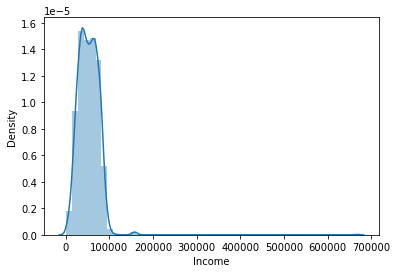

In [29]:
ax = sns.distplot(df['Income'])

### The Distribution is Right Skewed.
### Most incomes are distributed between 0 and 100000
### Will impute null values with median value, to avoid effects of outliers

In [30]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [31]:
df.isnull().sum().sort_values(ascending=False)

X.ID                          0
Year_Birth                    0
Response                      0
Z_Revenue                     0
Z_CostContact                 0
Complain                      0
AcceptedCmp2                  0
AcceptedCmp1                  0
AcceptedCmp5                  0
AcceptedCmp4                  0
AcceptedCmp3                  0
NumWebVisitsMonth             0
NumStorePurchases             0
NumCatalogPurchases           0
NumWebPurchases               0
NumDealsPurchases             0
MntGoldProds                  0
MntSweetProducts              0
MntFishProducts               0
MntMeatProducts               0
MntFruits                     0
MntWines                      0
Recency                       0
Dt_Customer                   0
Teenhome                      0
Kidhome                       0
Income                        0
Marital_Status                0
Education                     0
Categorized_Marital_Status    0
dtype: int64

## Handling Outliers

#### Year of Birth

<AxesSubplot:>

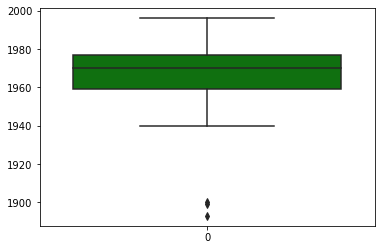

In [32]:
sns.boxplot(data = df['Year_Birth'], color = 'g')

In [33]:
filter = df [df["Year_Birth"]<= 1900]
display (filter)

,X.ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Categorized_Marital_Status
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,Single
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,Single
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,Couple


In [34]:
df = df[df['Year_Birth'] >= 1940]

<AxesSubplot:>

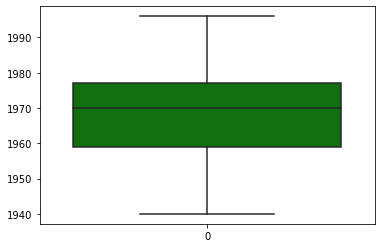

In [35]:
sns.boxplot(data = df['Year_Birth'], color = 'g')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   X.ID                        2237 non-null   int64         
 1   Year_Birth                  2237 non-null   int64         
 2   Education                   2237 non-null   object        
 3   Marital_Status              2237 non-null   object        
 4   Income                      2237 non-null   float64       
 5   Kidhome                     2237 non-null   int64         
 6   Teenhome                    2237 non-null   int64         
 7   Dt_Customer                 2237 non-null   datetime64[ns]
 8   Recency                     2237 non-null   int64         
 9   MntWines                    2237 non-null   int64         
 10  MntFruits                   2237 non-null   int64         
 11  MntMeatProducts             2237 non-null   int64       

#### Income

<AxesSubplot:>

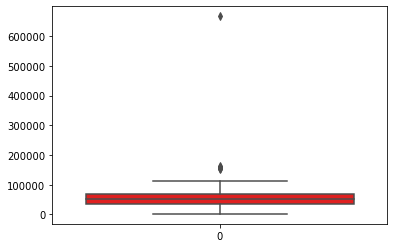

In [37]:
sns.boxplot(data = df['Income'], color = 'r')

In [38]:
filter = df[df["Income"]>200000]
display (filter)

,X.ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Categorized_Marital_Status
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,0,0,0,0,0,0,3,11,0,Couple


In [39]:
df = df[df['Income'] < 200000]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   X.ID                        2236 non-null   int64         
 1   Year_Birth                  2236 non-null   int64         
 2   Education                   2236 non-null   object        
 3   Marital_Status              2236 non-null   object        
 4   Income                      2236 non-null   float64       
 5   Kidhome                     2236 non-null   int64         
 6   Teenhome                    2236 non-null   int64         
 7   Dt_Customer                 2236 non-null   datetime64[ns]
 8   Recency                     2236 non-null   int64         
 9   MntWines                    2236 non-null   int64         
 10  MntFruits                   2236 non-null   int64         
 11  MntMeatProducts             2236 non-null   int64       

<AxesSubplot:>

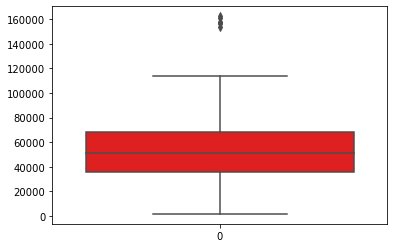

In [41]:
sns.boxplot(data = df['Income'], color = 'r')

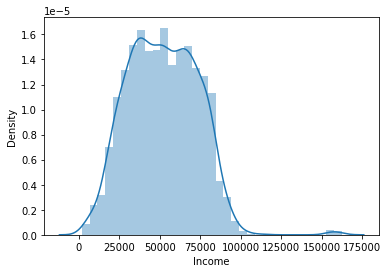

In [42]:
ax = sns.distplot(df['Income'])

#### Education

In [43]:
df['Education'].value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

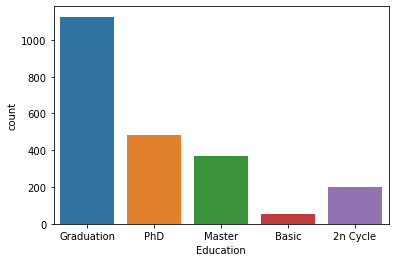

In [44]:
sns.countplot(x = df['Education'])

#### The total amount spent ('TotalMnt') can be engineered from the sum of all features containing 'Mnt'

In [45]:
mnt_cols = [col for col in df.columns if 'Mnt' in col]

In [46]:
##Axis 1 will act on all the COLUMNS in each ROW
df['Total_Amount_Spent'] = df[mnt_cols].sum(axis=1)  

#### The total purchases ('TotalPurchases') can be engineered from the sum of all features containing 'Purchases'

In [47]:
purchases_cols = [col for col in df.columns if 'Purchases' in col]

In [48]:
df['Total_Purchases'] = df[purchases_cols].sum(axis=1)

#### The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing 'Cmp' and 'Response' (the latest campaign)

In [49]:
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign

In [50]:
df['Total_Accepted_Campaigns'] = df[campaigns_cols].sum(axis=1)

#### The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'

In [51]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

#### Age of Customer

In [52]:
year=datetime.datetime.today().year

df['Age']=year - df['Year_Birth']

#### Age_groupe

In [53]:
bins= [18,39,59,90]
labels = ['Adult','Middle Age Adult','Senior Adult']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['AgeGroup'] = df['AgeGroup'].astype('object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   X.ID                        2236 non-null   int64         
 1   Year_Birth                  2236 non-null   int64         
 2   Education                   2236 non-null   object        
 3   Marital_Status              2236 non-null   object        
 4   Income                      2236 non-null   float64       
 5   Kidhome                     2236 non-null   int64         
 6   Teenhome                    2236 non-null   int64         
 7   Dt_Customer                 2236 non-null   datetime64[ns]
 8   Recency                     2236 non-null   int64         
 9   MntWines                    2236 non-null   int64         
 10  MntFruits                   2236 non-null   int64         
 11  MntMeatProducts             2236 non-null   int64       

#### Last Campaign Rename

In [55]:
df.rename(columns = {'Response':'Accepted_LastCmp'}, inplace = True)

#### Z_CostContact and Z_Revenue

In [56]:
display (df['Z_CostContact'].describe())
display ('------------------------------------')
display(df['Z_Revenue'].describe())

count    2236.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

'------------------------------------'

count    2236.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64

#### A basic summary of the Z_CostContact and Z_Revenue will find that they are filled only with 3s and 11s. Because there is no variation in the data we can't consider them variables and instead constants. They won't help with our analysis and we'll plan to drop them from the dataset.

In [57]:
df.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   X.ID                        2236 non-null   int64         
 1   Year_Birth                  2236 non-null   int64         
 2   Education                   2236 non-null   object        
 3   Marital_Status              2236 non-null   object        
 4   Income                      2236 non-null   float64       
 5   Kidhome                     2236 non-null   int64         
 6   Teenhome                    2236 non-null   int64         
 7   Dt_Customer                 2236 non-null   datetime64[ns]
 8   Recency                     2236 non-null   int64         
 9   MntWines                    2236 non-null   int64         
 10  MntFruits                   2236 non-null   int64         
 11  MntMeatProducts             2236 non-null   int64       

# Exploratory Data Analysis (EDA)

In [59]:
df.head()

,X.ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Accepted_LastCmp,Categorized_Marital_Status,Total_Amount_Spent,Total_Purchases,Total_Accepted_Campaigns,Dependents,Age,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,1,Single,1617,25,1,0,65,Senior Adult
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,Single,27,6,0,2,68,Senior Adult
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,Couple,776,21,0,0,57,Middle Age Adult
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,Couple,53,8,0,1,38,Adult
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,Couple,422,19,0,1,41,Middle Age Adult


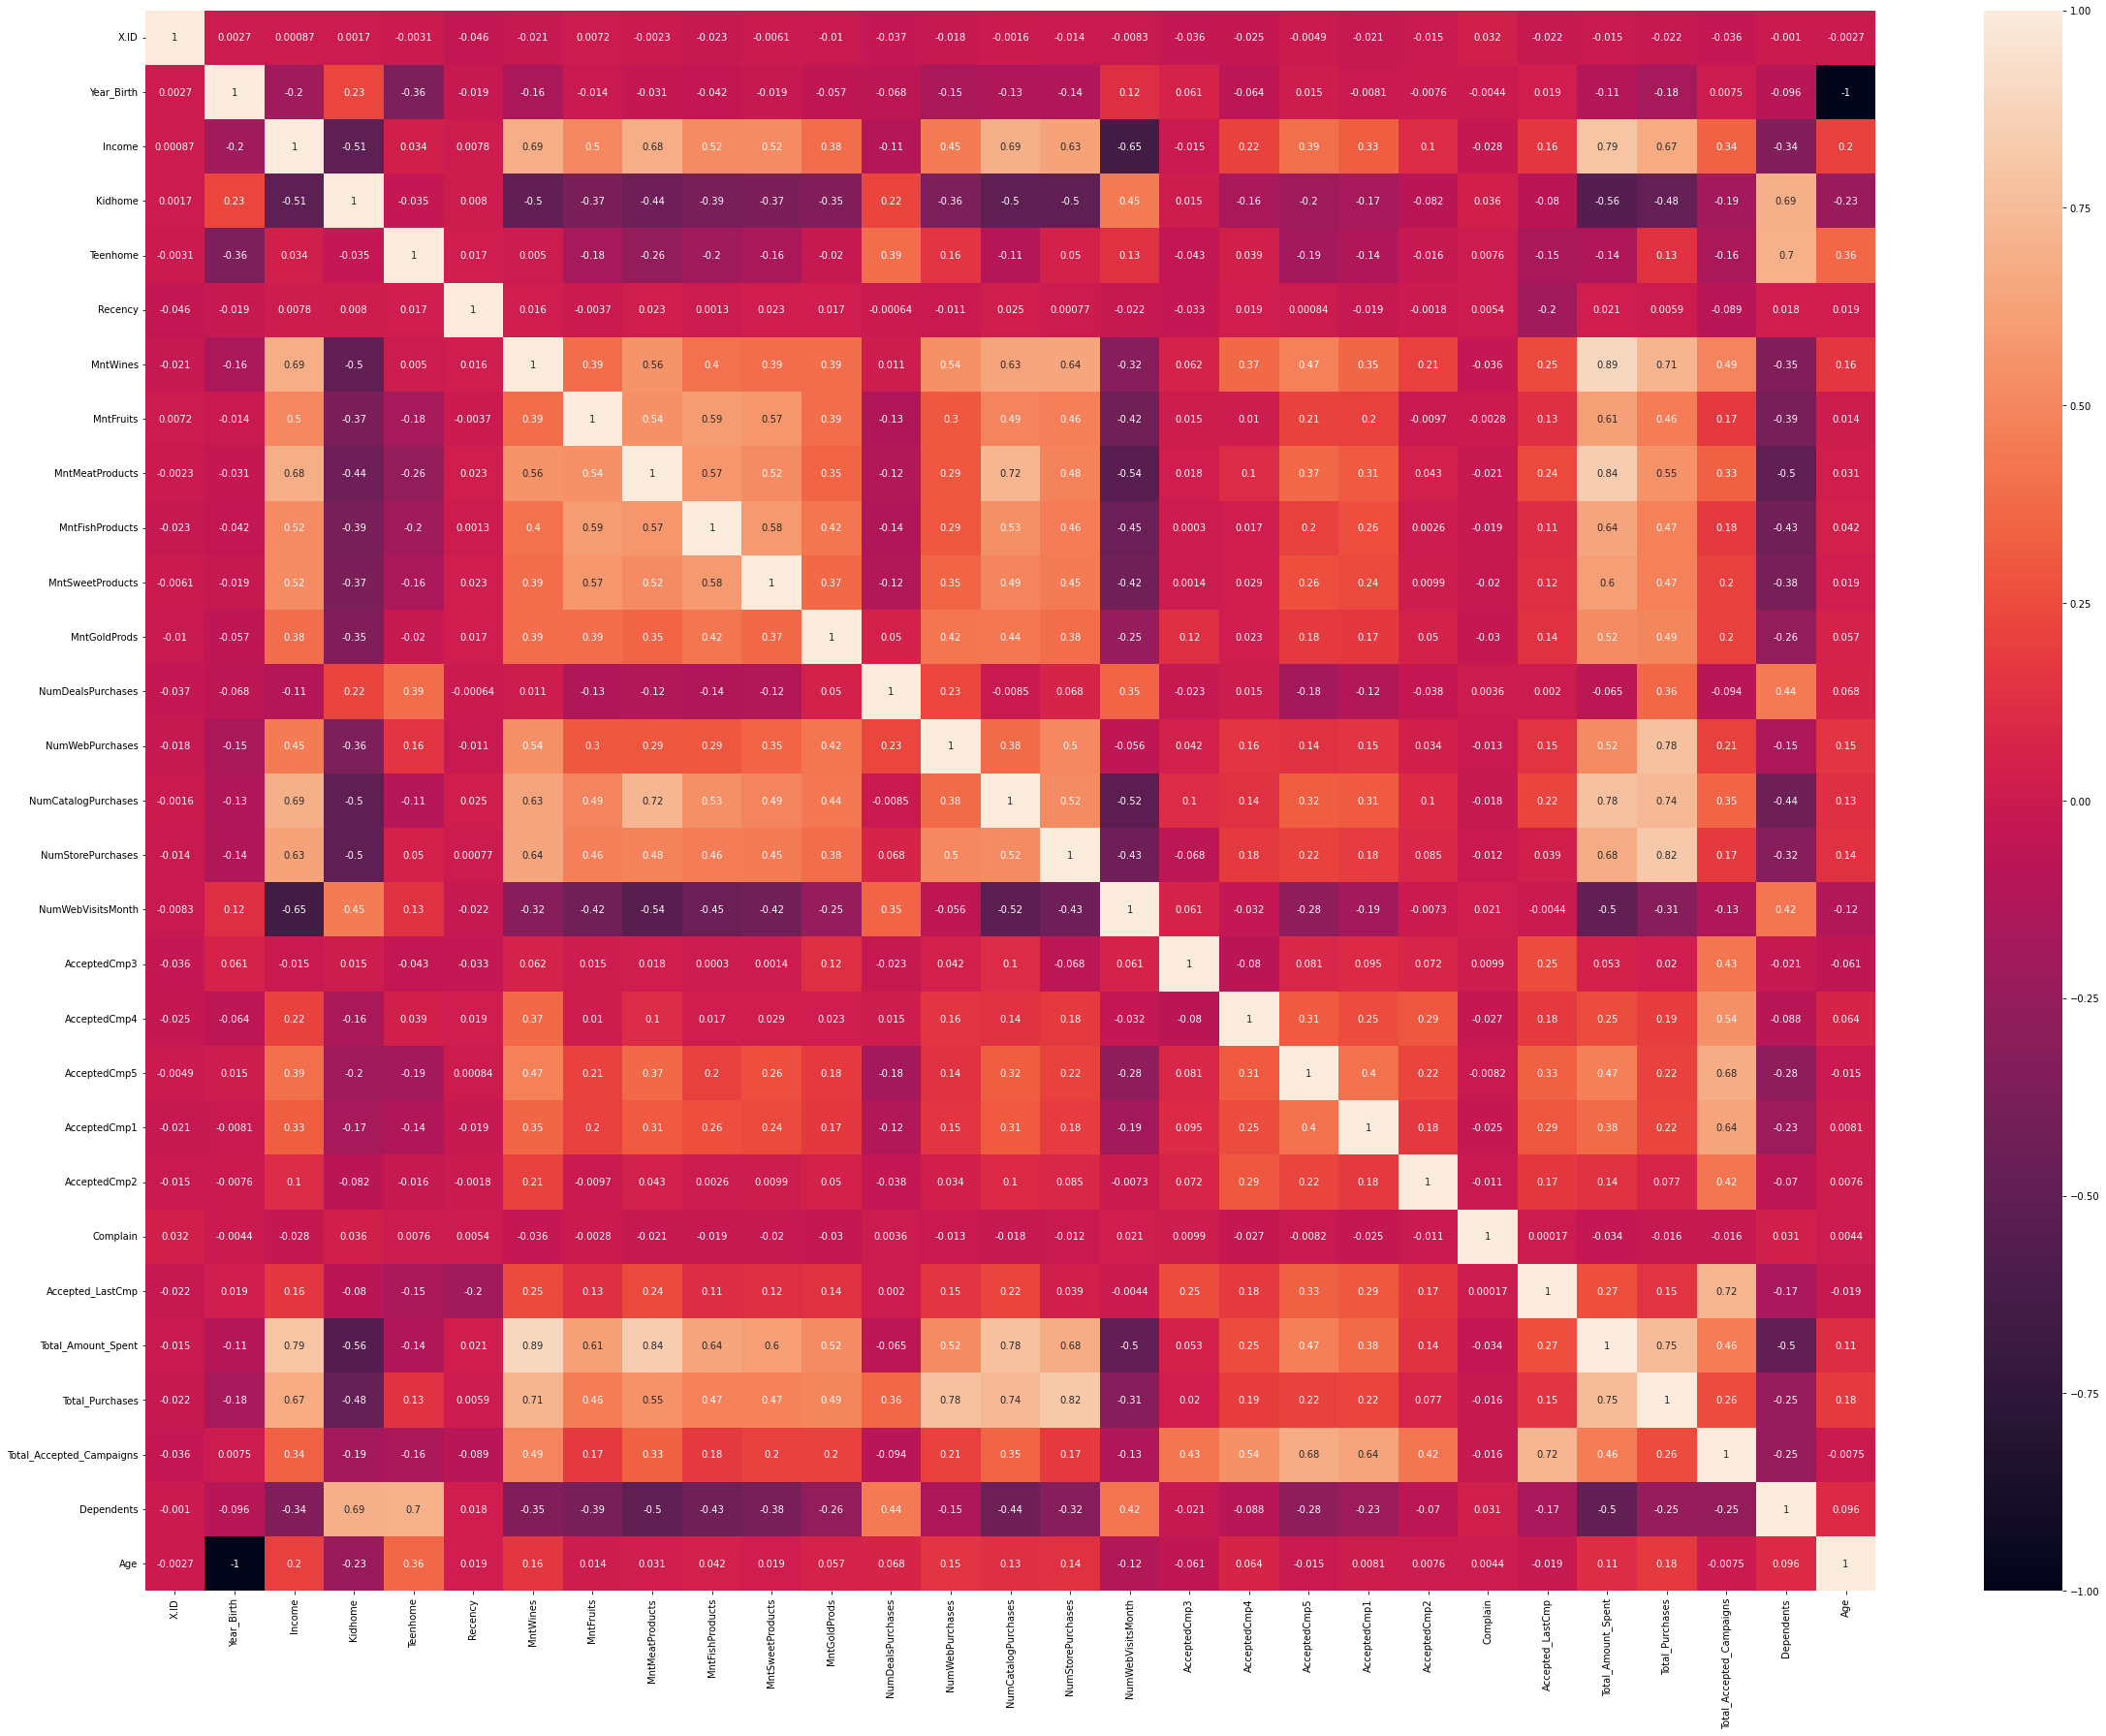

In [60]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

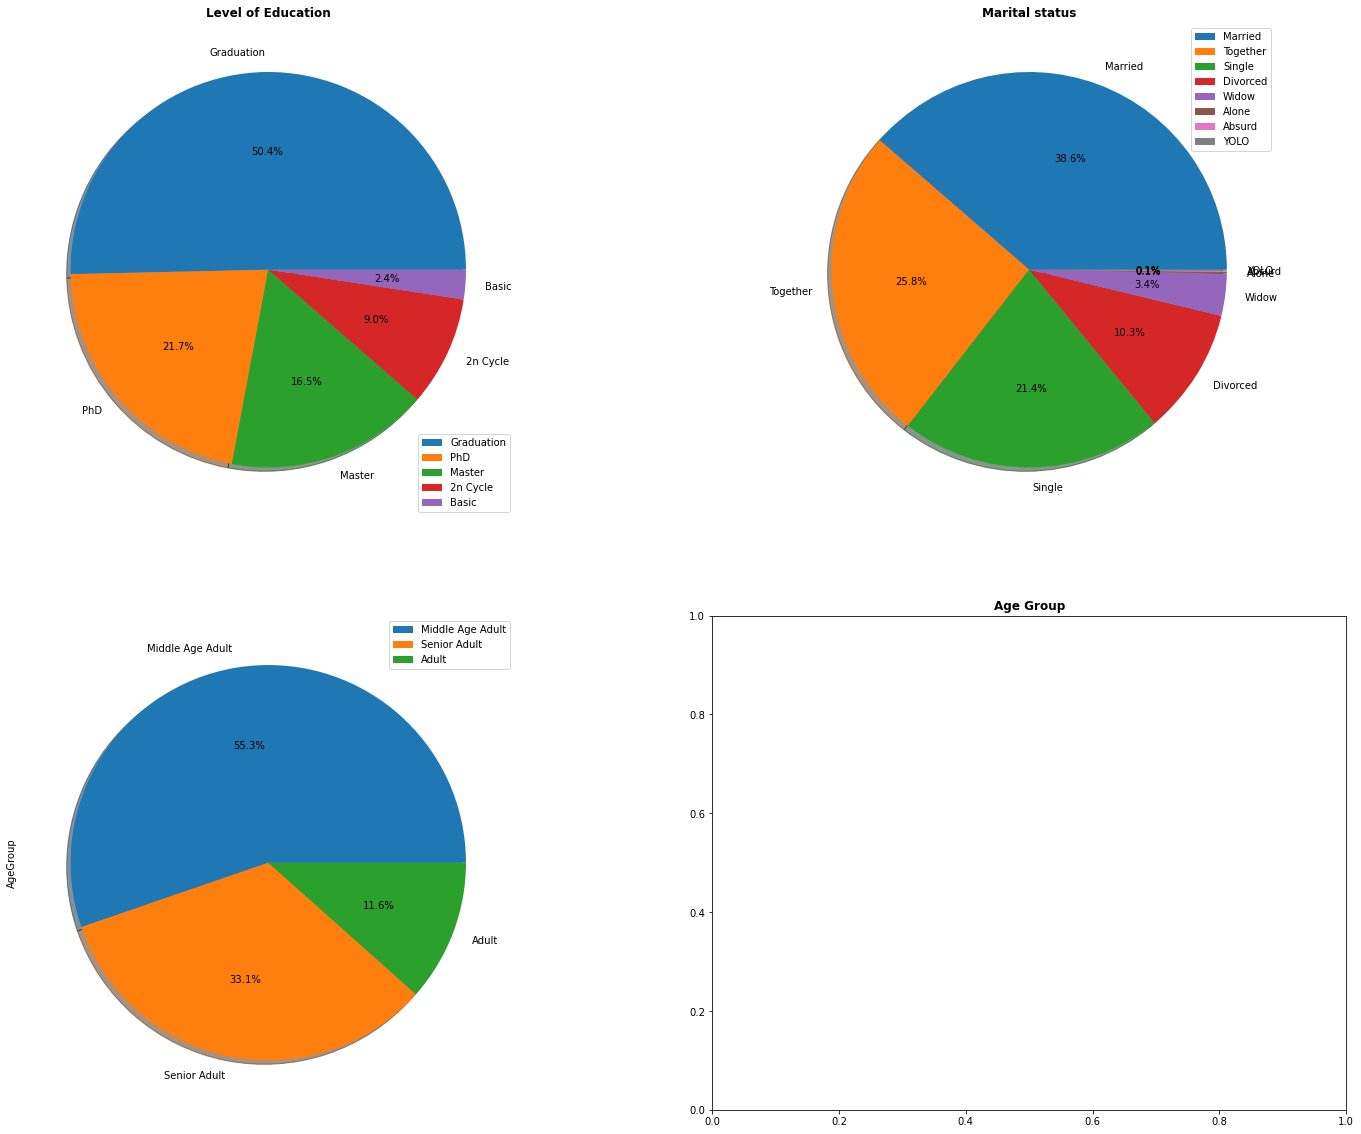

In [61]:
f,ax=plt.subplots(2,2,figsize=(25,20))


df['Education'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][0],shadow=True,legend=True)
ax[0][0].set_title('Level of Education',fontweight ='bold') 
ax[0][0].set_ylabel('')

df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][1],shadow=True,legend=True)
ax[0][1].set_title('Marital status',fontweight ='bold') 
ax[0][1].set_ylabel('')

df['AgeGroup'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][0],shadow=True,legend=True)
ax[1][1].set_title('Age Group',fontweight ='bold') 
ax[1][1].set_ylabel('');
plt.show()

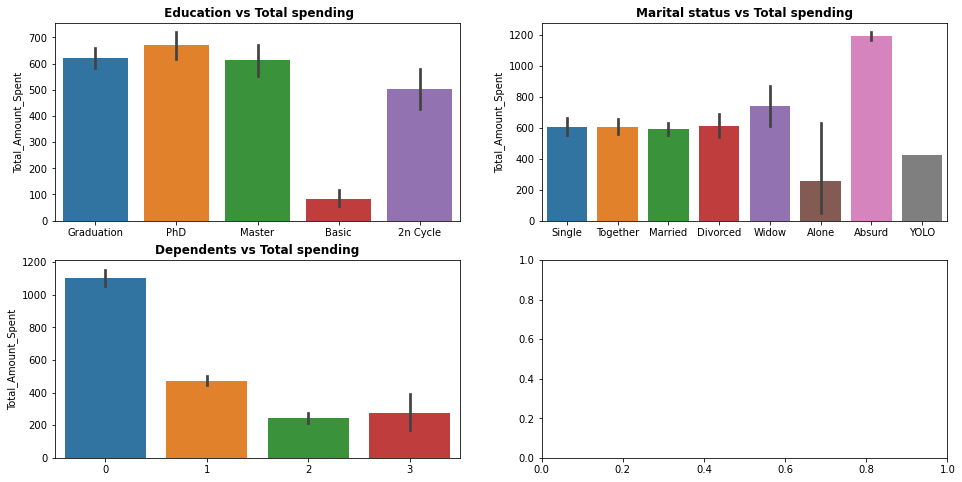

In [62]:
f,ax=plt.subplots(2,2,figsize=(16,8))

sns.barplot(x='Education', y='Total_Amount_Spent', data=df,ax=ax[0][0]);
ax[0][0].set_title(' Education vs Total spending',fontweight ='bold') 
ax[0][0].set_xlabel('')

sns.barplot(x='Marital_Status', y='Total_Amount_Spent', data=df,ax=ax[0][1]);
ax[0][1].set_title('Marital status vs Total spending',fontweight ='bold') 
ax[0][1].set_xlabel('')

sns.barplot(x='Dependents', y='Total_Amount_Spent', data=df,ax=ax[1][0]);
ax[1][0].set_title('Dependents vs Total spending',fontweight ='bold') 
ax[1][0].set_xlabel('')
plt.show()

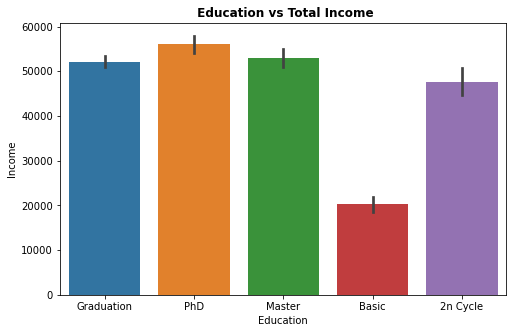

In [63]:
plt.figure(figsize = (8, 5))
plt.title(' Education vs Total Income',fontweight ='bold') 
sns.barplot(x='Education', y='Income', data=df)
plt.show()

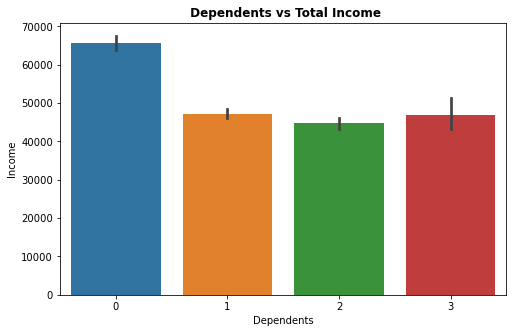

In [64]:
plt.figure(figsize = (8, 5))
plt.title(' Dependents vs Total Income',fontweight ='bold') 
sns.barplot(x='Dependents', y='Income', data=df)
plt.show()

#### Plot illustrating the effect of high income on spending

<AxesSubplot:xlabel='Total_Amount_Spent', ylabel='Income'>

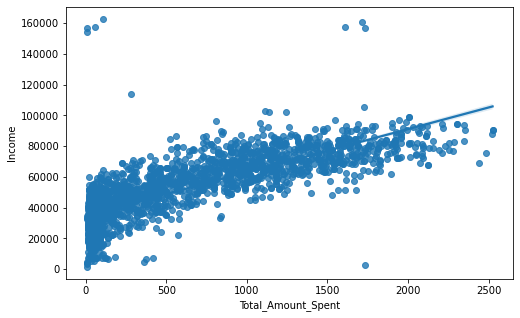

In [65]:
plt.figure(figsize = (8, 5))
sns.regplot(x = df['Total_Amount_Spent'], y = df['Income'])

#### Amount spent on different Products

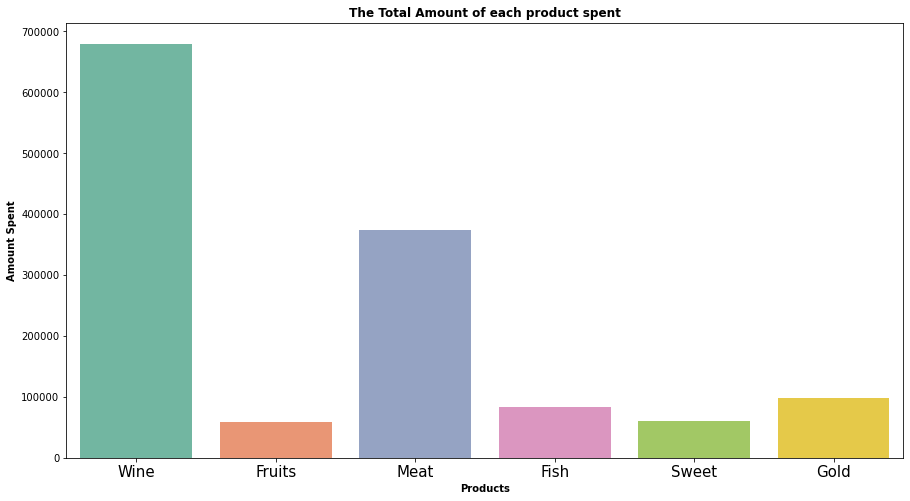

In [66]:
col_products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_filt = df[col_products].sum()

plt.figure(figsize=(15,8))
plt.title('The Total Amount of each product spent',fontweight ='bold')
x=sns.barplot(x=col_products,y=data_filt.values,palette='Set2')
x.set_xticklabels(['Wine', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'], size=15)
plt.xlabel('Products' ,fontweight ='bold')
plt.ylabel('Amount Spent' ,fontweight ='bold')
plt.show()

#### The number of purchases through the Each channels

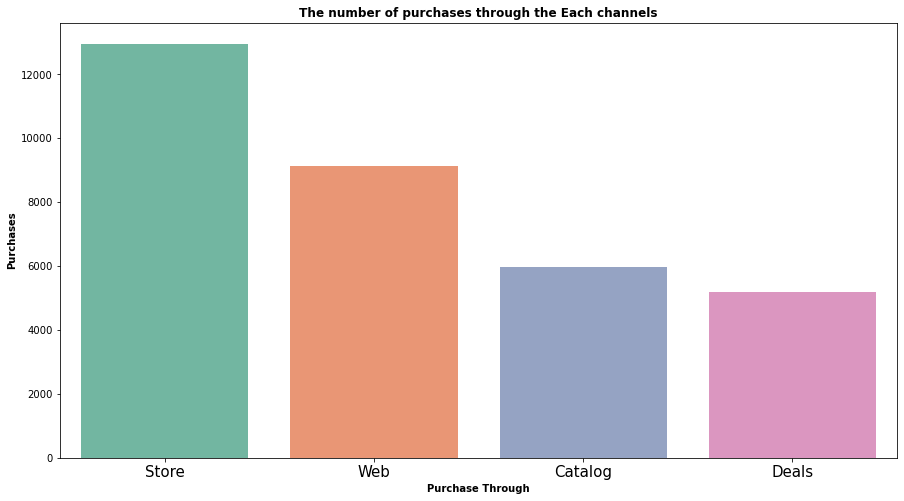

In [67]:
col_Purchases = ['NumStorePurchases','NumWebPurchases','NumCatalogPurchases', 'NumDealsPurchases']
data_filt = df[col_Purchases].sum()

plt.figure(figsize=(15,8))
plt.title('The number of purchases through the Each channels', fontweight ='bold')
x=sns.barplot(x=col_Purchases,y=data_filt.values,palette='Set2')
x.set_xticklabels(['Store', 'Web', 'Catalog', 'Deals'], size=15)
plt.xlabel('Purchase Through',fontweight ='bold')
plt.ylabel('Purchases' ,fontweight ='bold')
plt.show()

#### Number of Enrollments in each year

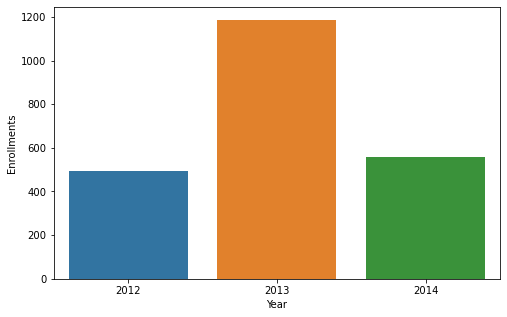

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['Dt_Customer'].dt.year)
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.show()

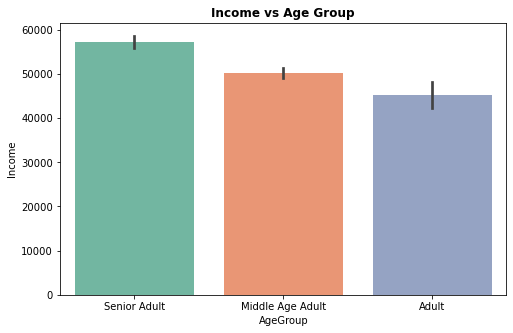

In [69]:
plt.figure(figsize=(8,5))
plt.title('Income vs Age Group',fontweight ='bold')
x=sns.barplot(data=df,x='AgeGroup',y='Income',palette='Set2')
plt.show()

#### Products amount vs age group

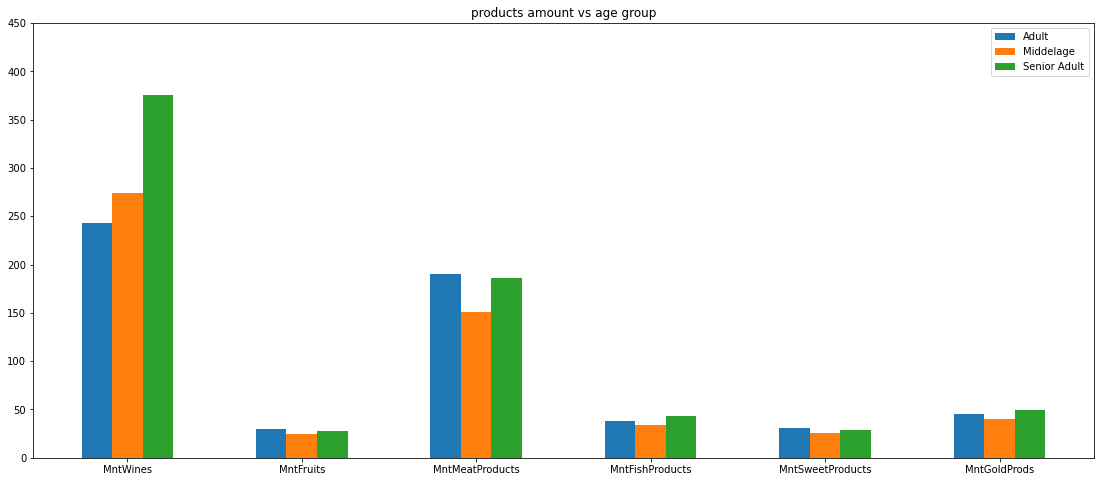

In [70]:
Products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
dataset = df.groupby('AgeGroup')[Products].mean()

score_label = np.arange(0, 500, 50)
Adult_mean  = list(dataset.T['Adult'])
Middleage_mean  = list(dataset.T['Middle Age Adult'])
SeniorAdult_mean  = list(dataset.T['Senior Adult'])
# set width of bar
barWidth = 0.35

fig, ax = plt.subplots(figsize=(19,8))

# Set position of bar on X axis
r1 = np.arange(0,len(Products)*2,2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


# Make the plot

Adult = ax.bar(r1, Adult_mean, width=barWidth, label='Adult')
Middleage = ax.bar(r2,Middleage_mean, width=barWidth, label='Middelage')
SeniorAdult= ax.bar(r3, SeniorAdult_mean,width=barWidth, label='Senior Adult')


# inserting x axis label
plt.xticks([r + barWidth for r in range(0,len(Products)*2,2)], dataset)
ax.set_xticklabels(Products)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

plt.title('products amount vs age group')
plt.show()

In [71]:
df.to_csv('marketing_campaign_after_cleaning.csv', index=False)